In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex" : "True",
    "font.family": "Times"
})

from scipy.linalg import eigh, norm

# Sawtooth lattice

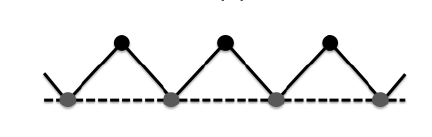

In [2]:
from IPython import display
display.Image("sawtooth/sawtooth.png")

In this notebook, we diagonalize the real-space hamiltonian of the sawtooth model in figure. A widely celebrated feature of this model is the arisal of a flat band in the spectrum for a certain choice of the energies involved. In particolar, referring to black sites as _A sites_ and grey ones as _B sites_, the condition for having a flat band is
\begin{gather}
    \varepsilon_A = \varepsilon_B \\
    J_{AB} = \sqrt{2} \, J_{BB}\\
    J_{AA} = 0
\end{gather}
where $\varepsilon$ is the on-site energy and $J$ is the hopping energy. 

In [3]:
N = 200 #number of primitive cells
n = 2*N #number of points

# On-site energies
eps_a = eps_b = 0.

# Hopping terms
t_aa = 0. 
t_ab = np.sqrt(2)
t_bb = 1.

Here, we construct the real-space Hamiltonian under periodic boundary conditions.

In [4]:
H = np.diag([eps_b/2,eps_a/2]*N)
H += np.diag([-t_ab]*(n-1),k=1)
H += np.diag([-t_bb,-t_aa]*(N-1),k=2)

H[0,n-2] -= t_bb

H += np.conjugate(H.transpose())

We diagonalize it. We get two spurious states localized at the "boundaries" of the lattice. After further investigations, this has been attributed to a numerical errors. Those states do not give any effect if the atom is put in the middle of the chain, as they're highly localized. 

In [5]:
eigvals, eigvect = eigh(H)

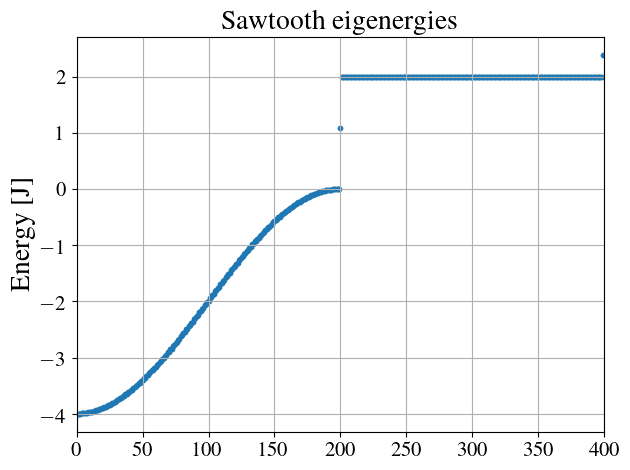

In [17]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("Sawtooth eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigvals))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

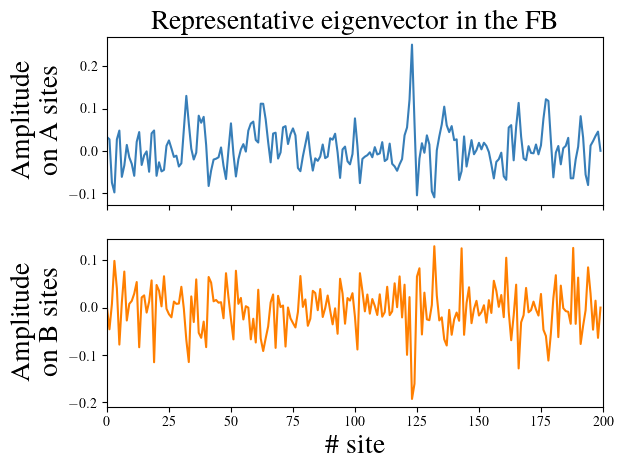

In [36]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True)

ax[0].plot(eigvect[1::2,-3],color="#377eb8")
ax[1].plot(eigvect[::2,-3],color='#ff7f00')

ax[0].set_title("Representative eigenvector in the FB",fontsize=20)
ax[1].set_xlabel("\# site",fontsize=20)
ax[0].set_ylabel("Amplitude \n on A sites",fontsize=20)
ax[1].set_ylabel("Amplitude \n on B sites",fontsize=20)

ax[1].set_xlim(0,len(eigvals)//2)

#plt.savefig("eig_FB.pdf")
plt.show()